# Libraries Import


In [1]:
import csv
import string
import re
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install nltk
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,pos_tag
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zhuol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\zhuol\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zhuol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zhuol\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Data preprocessing

We decided not to remove stopwords, and not to perform stemming and lemmatization.

This is because stopwords convey meanings in this context. For example, "I am not happy" and "I am happy" yields different result


In [2]:
# def remove_stopwords(text):
#   stopwords = nltk.corpus.stopwords.words('english')
#   return [word for word in text if word not in stopwords]

# def lemmatization(text_list):
#   result = []
#   wordnet = WordNetLemmatizer()
  
#   for token, tag in pos_tag(text_list):
#     pos = tag[0].lower()

#     if pos not in ['a','r','n','v']:
#       pos = 'n'

#     result.append(wordnet.lemmatize(token, pos))

#   return result

# def stemming(text_list):
#   porter = PorterStemmer()

#   result = []
#   for word in text_list:
#     result.append(porter.stem(word))

#   return result

def remove_noise(text):
  # lower text
  text = text.lower()

  # remove rt
  text = re.sub('@[A-Za-z0-9]+','',text)

  #remove tab, new line, ans back slice
  text = text.replace('\\t',' ').replace('\\n',' ').replace('\\u',' ').replace('\\','')

  #remove non ASCII (emoticon, chinese word, etc)
  text = text.encode('ascii','replace').decode('ascii')


  # remove incomplete URL
  text.replace('http://',' ').replace('https://',' ')

  # remove any hyperlink
  text = re.sub(r'https?:\/\/\S+','',text)

  # remove punctuation
  text = text.translate(str.maketrans('', '', string.punctuation))

  text = text.strip()

  return text


# Data Loading
 please find the dataset at https://www.kaggle.com/datasets/kazanova/sentiment140

In [59]:
#download the dataset from Kaggle and replace the path
data = pd.read_csv('dataset/training.1600000.processed.noemoticon.csv',encoding='latin-1')
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "TweetText"]
data.columns = DATASET_COLUMNS
data.head()

,target,ids,date,flag,user,TweetText
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


# Text Preprocessing

In [7]:
df = pd.read_csv('dataset/training.1600000.processed.noemoticon.csv',encoding='latin-1')
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "TweetText"]
df.columns = DATASET_COLUMNS
df = df.sample(frac=1).reset_index(drop=True)
df.loc[df['target'] == 4, 'target'] = 1
df.head()

,target,ids,date,flag,user,TweetText
0,1,1554015423,Sat Apr 18 15:50:12 PDT 2009,NO_QUERY,Ihaterob,The filet migon is on the grill hopefully I ge...
1,0,2327854482,Thu Jun 25 08:52:10 PDT 2009,NO_QUERY,CarJoyAtk,So happy I got to wake up to Taylors voice thi...
2,1,1968027598,Fri May 29 20:37:49 PDT 2009,NO_QUERY,AndrewHansen1,@lindasmith247 &quot;who&quot; is the best? I'...
3,1,1977234508,Sat May 30 20:27:10 PDT 2009,NO_QUERY,Warmnfuzzy,@williger Here ya go- http://bit.ly/oYIjE .....
4,1,1469730064,Tue Apr 07 07:14:59 PDT 2009,NO_QUERY,aksala13,@SistersTalk That would be entertaining! lol...


In [9]:
df['clean_text'] = df['TweetText'].astype(str).apply(remove_noise)
df.head()

,target,ids,date,flag,user,TweetText,clean_text
0,1,1554015423,Sat Apr 18 15:50:12 PDT 2009,NO_QUERY,Ihaterob,The filet migon is on the grill hopefully I ge...,the filet migon is on the grill hopefully i ge...
1,0,2327854482,Thu Jun 25 08:52:10 PDT 2009,NO_QUERY,CarJoyAtk,So happy I got to wake up to Taylors voice thi...,so happy i got to wake up to taylors voice thi...
2,1,1968027598,Fri May 29 20:37:49 PDT 2009,NO_QUERY,AndrewHansen1,@lindasmith247 &quot;who&quot; is the best? I'...,quotwhoquot is the best im not sure i understand
3,1,1977234508,Sat May 30 20:27:10 PDT 2009,NO_QUERY,Warmnfuzzy,@williger Here ya go- http://bit.ly/oYIjE .....,here ya go they get more beautiful every time ...
4,1,1469730064,Tue Apr 07 07:14:59 PDT 2009,NO_QUERY,aksala13,@SistersTalk That would be entertaining! lol...,that would be entertaining lol i hope the hear...


# Data Splitting

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [10]:
tokenizer = Tokenizer(oov_token = '<OOV>')

split = round(len(df) * 0.8)
X_train = df['clean_text'][:split]
y_train = df['target'][:split]

X_test = df['clean_text'][split:]
y_test = df['target'][split:]


In [64]:
X_train

0          the filet migon is on the grill hopefully i ge...
1          so happy i got to wake up to taylors voice thi...
2           quotwhoquot is the best im not sure i understand
3          here ya go they get more beautiful every time ...
4          that would be entertaining lol i hope the hear...
                                 ...                        
1279994    having my final concert here in dubai tomorrow...
1279995    are you sure its mandy moore anyone could be m...
1279996    medvet sent 4 pawprints today in the mail and ...
1279997      the day is just uninteresting without the leila
1279998                                             told you
Name: clean_text, Length: 1279999, dtype: object

In [65]:
y_train

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

## Hyperparameters
Here, we define some important hyperparameters.

`vocab_size` refers the maximum size of vocabulary.

`embedding_dim` refer the sequence length that we take iin as input.

`max_length` refers to the maximum length of sequence padding.

In [11]:
vocab_size = 40000
embedding_dim = 16
max_length = 50
trunc_type = 'post'
oov_tok = '<OOV>'
padding_type = 'post'

# Tokenization & Sequence Padding

In [12]:
#Generating word index dict
tokenizer = Tokenizer(num_words=vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

In [13]:
# Convert texts into integer based on the word index generated 
sequences = tokenizer.texts_to_sequences(X_train)

# padding the sentences to reach a max length of 120 words
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type, padding=padding_type)

# Do the same thing for testing data
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, truncating= trunc_type,padding=padding_type)

# Model Training
We will use Neural Network as our model

In [46]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
  #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(10,return_sequences=True, dropout=0.25, recurrent_dropout=0.1)),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(10, activation= 'relu'),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [47]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer='adam', metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            640000    
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 640,181
Trainable params: 640,181
Non-trainable params: 0
________________________________________________

In [49]:
# y_train = tf.keras.utils.to_categorical(y_train)
# y_test = tf.keras.utils.to_categorical(y_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [51]:
epochs = 5

history = model.fit(padded, y_train, epochs=epochs,validation_split = 0.2)

Epoch 1/5
32000/32000 [==============================] - 238s 7ms/step - loss: 0.4230 - accuracy: 0.8093 - val_loss: 0.4311 - val_accuracy: 0.8034
Epoch 2/5
32000/32000 [==============================] - 241s 8ms/step - loss: 0.4191 - accuracy: 0.8118 - val_loss: 0.4303 - val_accuracy: 0.8024
Epoch 3/5
32000/32000 [==============================] - 236s 7ms/step - loss: 0.4166 - accuracy: 0.8129 - val_loss: 0.4299 - val_accuracy: 0.8034
Epoch 4/5
32000/32000 [==============================] - 238s 7ms/step - loss: 0.4145 - accuracy: 0.8143 - val_loss: 0.4318 - val_accuracy: 0.8022
Epoch 5/5
32000/32000 [==============================] - 236s 7ms/step - loss: 0.4126 - accuracy: 0.8157 - val_loss: 0.4309 - val_accuracy: 0.8037


In [52]:
results = model.evaluate(X_test_padded, y_test)
print(f'Test loss: {results[0]}, test accuracy: {results[1]}')

10000/10000 [==============================] - 30s 3ms/step - loss: 0.4309 - accuracy: 0.8037
Test loss: 0.43091410398483276, test accuracy: 0.8036656379699707


In [53]:
y_pred = model.predict(X_test_padded)

10000/10000 [==============================] - 17s 2ms/step


In [54]:
y_predd = [1 if y >= 0.5 else 0 for y in y_pred ]

# Model Evaluation
We will evaluate our model using confusion matrix, and classification report

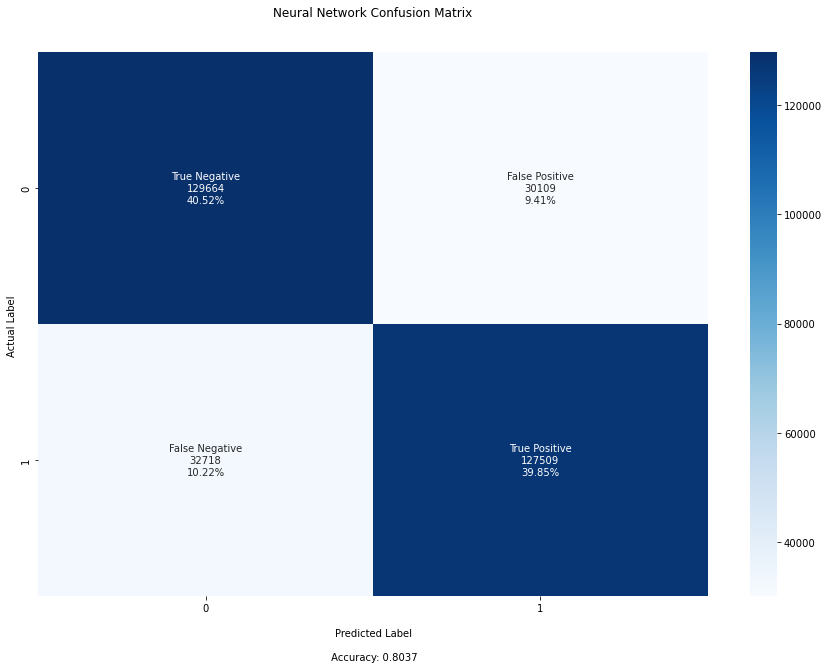

              precision    recall  f1-score   support

           0    0.79851   0.81155   0.80498    159773
           1    0.80897   0.79580   0.80233    160227

    accuracy                        0.80367    320000
   macro avg    0.80374   0.80368   0.80366    320000
weighted avg    0.80375   0.80367   0.80365    320000



In [55]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

classes = ['Negative', 'Positive']

CLASSES = ['True Negative', 'False Positive','False Negative','True Positive']

CATEGORIES = ["0","1"]
def makeConfusionMatrix(y_test,y_predd):
    cf_matrix = confusion_matrix(y_test, y_predd)

    group_names = CLASSES
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    plt.figure(figsize=(15,10))
    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    ax.set_title('Neural Network Confusion Matrix\n\n');
    ax.set_xlabel(f'\nPredicted Label\n\n Accuracy: {np.round(results[1],4)}')
    ax.set_ylabel('Actual Label ')

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(CATEGORIES)
    ax.yaxis.set_ticklabels(CATEGORIES)

    ## Display the visualization of the Confusion Matrix.
    plt.show()
    print(classification_report(y_test, y_predd, digits=5))

makeConfusionMatrix(y_test,y_predd)


In [56]:
model.save('tensorflow_text_classification.h5')

In [57]:
def convert(text):
  # Convert texts into integer based on the word index generated 
  sequences = tokenizer.texts_to_sequences(text)

  # padding the sentences to reach a max length of 120 words
  padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type, padding=padding_type)

  return padded
text = ['Hi I am very happy, I am on vaccation today', "I am depressed","Today i am very sad","I just had my lunch","Bye I am going to suicide","I scored A"]
convertedText = convert(text)

predictions = model.predict([convertedText])
for i,pred in enumerate(predictions):
  print(f'{text[i]}\nSentiment: {classes[1 if pred >= 0.5 else 0]}\n')

1/1 [==============================] - 0s 50ms/step
Hi I am very happy, I am on vaccation today
Sentiment: Positive

I am depressed
Sentiment: Negative

Today i am very sad
Sentiment: Negative

I just had my lunch
Sentiment: Positive

Bye I am going to suicide
Sentiment: Negative

I scored A
Sentiment: Positive

